# Проектная работа по анализу данных
Цель работы - провести анализ данных.

# Исходные данные
Этот набор данных представляет собой описание около 1 миллиона треков с платформы Spotify. Скачаем датасет и ознакомимся с описанием данных в [источнике](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data).

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('spotify_data.csv', index_col=0)

In [39]:
df.sample(3).T

,246350,102499,425735
artist_name,JPEGMAFIA,Steve Mason,Faidra
track_name,i just killed a cop now i'm horny - Instrumental,Oh My Lord,Tomb of Giants
track_id,3Wg9R5pv8GwwhQeTZgSDLw,4SvNwP1nd7UM2BtzmnMJTO,298OU8xAWrlTce0qTLpsq9
popularity,16,22,16
year,2016,2013,2020
genre,industrial,singer-songwriter,black-metal
danceability,0.617,0.596,0.37
energy,0.54,0.764,0.751
key,2,7,2
loudness,-10.281,-7.009,-5.55


# Вопросы

### 1. Посмотрим сколько уникальных исполнителей и сколько уникальных жанров содержится в датасете

In [40]:
genres = df['genre'].unique()
artists = df['artist_name'].unique()

print(len(artists), len(genres))

64159 82


```
Уникальных исполнителей: 64159
Уникальных жанров: 82
```

### 2. Проверим наличие пропусков в данных и при необходимости заполненим их


In [41]:
value_counts_dict = df.isnull().sum()
print(value_counts_dict)
df['artist_name'].fillna("Unknown", inplace=True)  # Заполнение для жанров
df['track_name'].fillna(df['duration_ms'].median(), inplace=True)  # Заполнение для длительности
value_counts_dict =df.isnull().sum()
print(value_counts_dict)

artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64
artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64


### 3. Проверим данные на соответствие указанным ограничениям в описании датасета


In [42]:
# Popularity: от 0 до 100
invalid_popularity = df.loc[(df['popularity'] < 0) | (df['popularity'] > 100)]
df.loc[(df['popularity'] < 0) | (df['popularity'] > 100)]['popularity'] = df['popularity'].mode()[0]

# Year: диапазон от 2000 до 2023
invalid_year = df.loc[(df['year'] < 2000) | (df['year'] > 2023)]
df.loc[(df['year'] < 2000) | (df['year'] > 2023)]['year'] = df['year'].mode()[0]

# Danceability: от 0.0 до 1.0
invalid_danceability = df.loc[(df['danceability'] < 0.0) | (df['danceability'] > 1.0)]
df.loc[(df['danceability'] < 0.0) | (df['danceability'] > 1.0)]['danceability'] = df['danceability'].median()

# Energy:от 0.0 до 1.0
invalid_energy = df.loc[(df['energy'] < 0.0) | (df['energy'] > 1.0)]
df.loc[(df['energy'] < 0.0) | (df['energy'] > 1.0)]['energy'] = df['energy'].median()

# Key: от -1 до 11
invalid_key = df.loc[(df['key'] < -1) | (df['key'] > 11)]
df.loc[(df['key'] < -1) | (df['key'] > 11)]['key'] = df['key'].mode()[0]

# Loudness:от -60 до 0
invalid_loudness = df.loc[(df['loudness'] < -60) | (df['loudness'] > 0)]
df.loc[df['loudness'] < -60]['loudness'] = -60
df.loc[df['loudness'] > 0]['loudness'] = 0

# Mode: значения 0 или 1
invalid_mode = df.loc[~df['mode'].isin([0, 1])]
df.loc[~df['mode'].isin([0, 1])]['mode'] = df['mode'].mode()[0]

# Speechiness:  от 0.0 до 1.0
invalid_speechiness = df.loc[(df['speechiness'] < 0.0) | (df['speechiness'] > 1.0)]
df.loc[(df['speechiness'] < 0.0) | (df['speechiness'] > 1.0)]['speechiness'] = df['speechiness'].median()

# Acousticness: от 0.0 до 1.0
invalid_acousticness = df.loc[(df['acousticness'] < 0.0) | (df['acousticness'] > 1.0)]
df.loc[(df['acousticness'] < 0.0) | (df['acousticness'] > 1.0)]['acousticness'] = df['acousticness'].median()

# Instrumentalness: от 0.0 до 1.0
invalid_instrumentalness = df.loc[(df['instrumentalness'] < 0.0) | (df['instrumentalness'] > 1.0)]
df.loc[(df['instrumentalness'] < 0.0) | (df['instrumentalness'] > 1.0)]['instrumentalness'] = df['instrumentalness'].median()

# Liveness: от 0.0 до 1.0
invalid_liveness = df.loc[(df['liveness'] < 0.0) | (df['liveness'] > 1.0)]
df.loc[(df['liveness'] < 0.0) | (df['liveness'] > 1.0)]['liveness'] = df['liveness'].median()

# Valence: от 0.0 до 1.0
invalid_valence = df.loc[(df['valence'] < 0.0) | (df['valence'] > 1.0)]
df.loc[(df['valence'] < 0.0) | (df['valence'] > 1.0)]['valence'] = df['valence'].median()

# Tempo: > 0
invalid_tempo = df.loc[df['tempo'] <= 0]
df.loc[df['tempo'] <= 0, 'tempo'] = df['tempo'].median()

# Time_signature:  от 3 до 7
invalid_time_signature = df.loc[(df['time_signature'] < 3) | (df['time_signature'] > 7)]
df.loc[(df['time_signature'] < 3) | (df['time_signature'] > 7)]['time_signature'] = df['time_signature'].mode()[0]

# Duration_ms: > 0
invalid_duration_ms = df.loc[df['duration_ms'] <= 0]
df.loc[df['duration_ms'] <= 0]['duration_ms'] = df['duration_ms'].median()

## Визуальный анализ

### 1. Найдем зависимости Energy от Danceability; Loudness от Energy. Проверим как эти параметры влияют на Valence

Исследуем:
- Зависимость Energy от Danceability
- Зависимость Loudness от Energy
- Зависимость Valence от Energy, зависимость Valence от Danceability
- Зависимость Valence от Loudness
- Матрица корреляции Energy, Danceability, Loudness, Valence

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

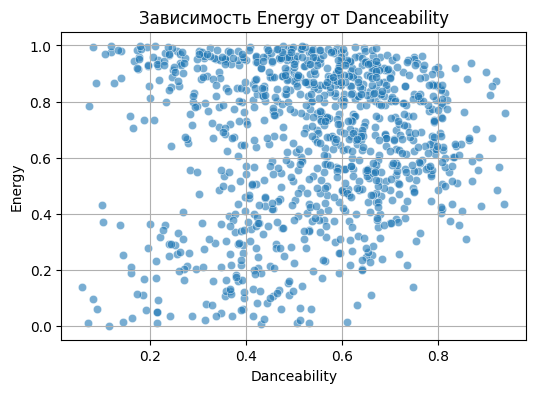

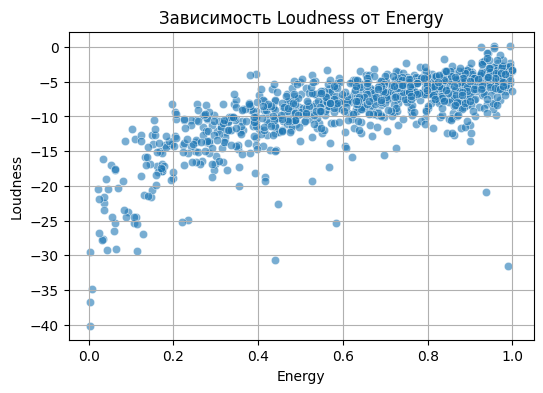

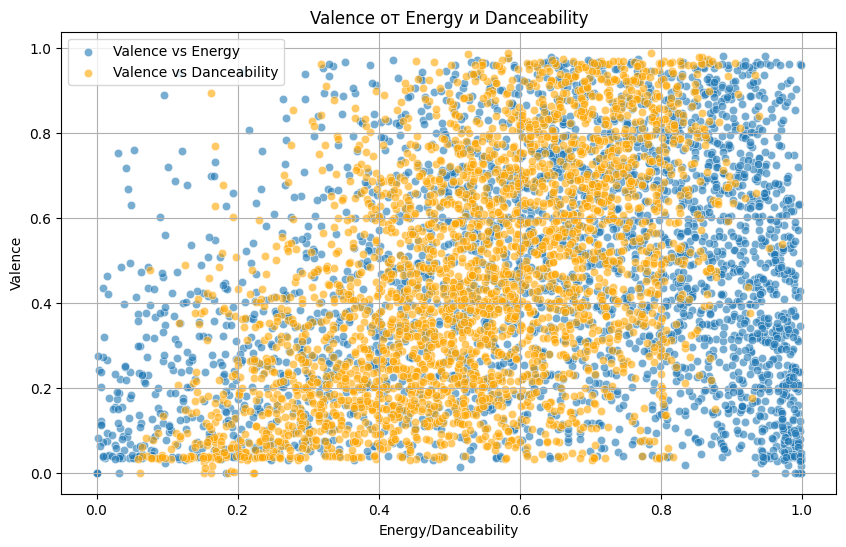

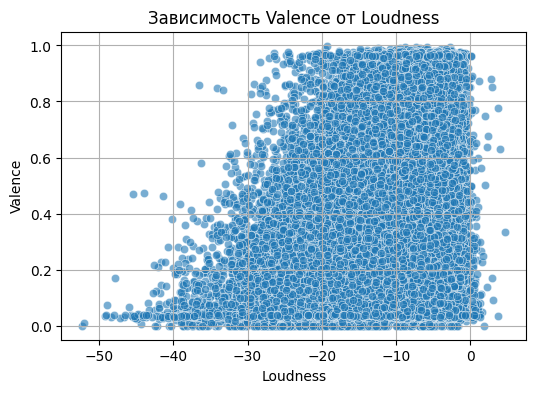

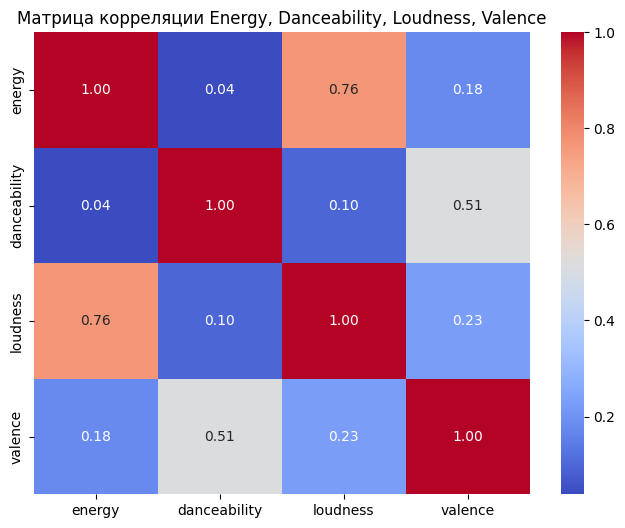

In [44]:
# График: Зависимость Energy от Danceability
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df.sample(1000), x='danceability', y='energy', alpha=0.6)
plt.title('Зависимость Energy от Danceability')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# График: Зависимость Loudness от Energy
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df.sample(1000), x='energy', y='loudness', alpha=0.6)
plt.title('Зависимость Loudness от Energy')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.grid(True)
plt.show()

# Графики: Valence от Energy и Valence от Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(3000), x='energy', y='valence', alpha=0.6, label='Valence vs Energy')
sns.scatterplot(data=df.sample(3000), x='danceability', y='valence', alpha=0.6, label='Valence vs Danceability', color='orange')
plt.title('Valence от Energy и Danceability')
plt.xlabel('Energy/Danceability')
plt.ylabel('Valence')
plt.legend()
plt.grid(True)
plt.show()

# График: Зависимость Valence от Loudness
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df.sample(100000), x='loudness', y='valence', alpha=0.6)
plt.title('Зависимость Valence от Loudness')
plt.xlabel('Loudness')
plt.ylabel('Valence')
plt.grid(True)
plt.show()

# Матрица корреляции
correlation_matrix = df[['energy', 'danceability', 'loudness', 'valence']].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции Energy, Danceability, Loudness, Valence')
plt.show()

#### Вывод:
Судя по графикам и корреляционной матрице настроение трека почти не зависит от его энергии и громкости, но наблюдается небольшая корреляция с "танцевальностью" трека. На 3ем графике по желтым точкам прослеживается некоторая линейная зависимость, но с увеличением количества точек эта полоска просто уширяется, поэтому нельзя однозначно сказать, что они линейно связаны. по 4ому графику можно заметить что начиная с некторого предела шума настроение треков начинает падать вплоть до нуля, но это связано не только с восприятием тихих песен, но еще и с тем, что таких в принципе мало из-за ограниченности человеческого слуха.

### 2. Определим как меняется музыка с годами (ствновится быстрее или дольше)

Найдем следующие зависимости:
- Зависимость средней продолжительности трека от года, с линией тренда
- Изменение средней продолжительности топ-5 самых длинных треков года
- Изменение средней продолжительности топ-5 самых коротких треков года

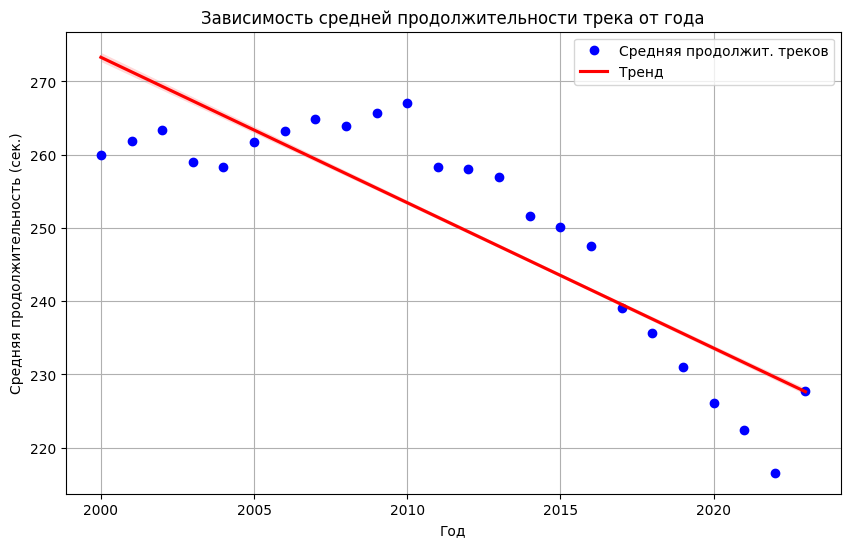

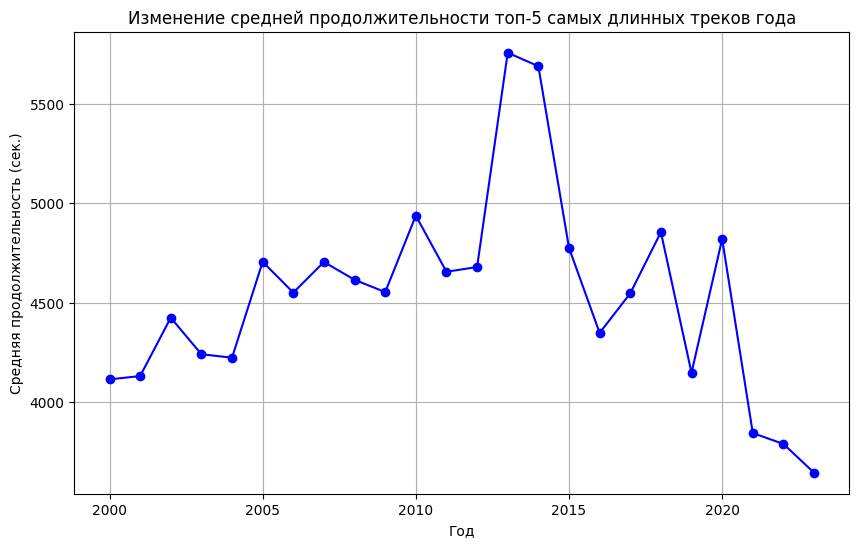

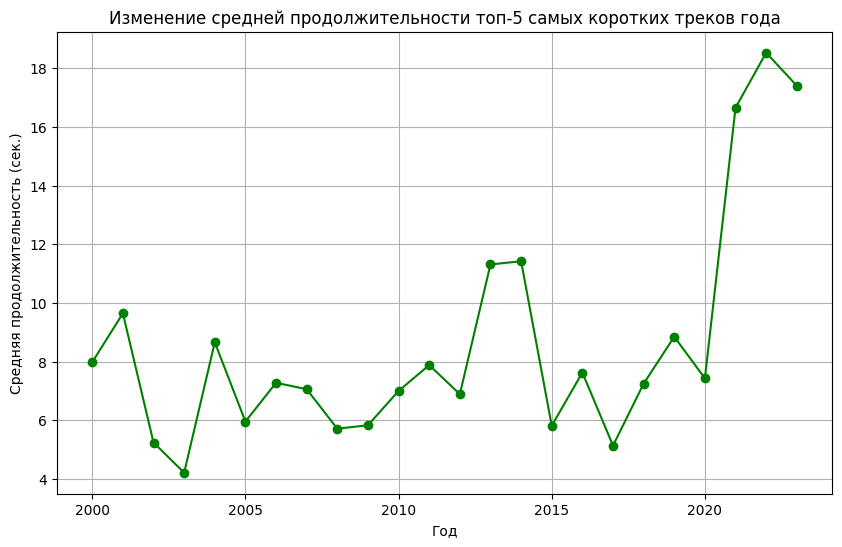

In [45]:
df['duration_sec'] = df['duration_ms'] / 1000

avg_tracks = df.groupby('year')['duration_sec'].mean()

plt.figure(figsize=(10, 6))
avg_tracks.plot(kind='line', marker='o', color='blue', linestyle='', label='Средняя продолжит. треков')
sns.regplot(data=df, x='year', y='duration_sec', scatter=False, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, label='Тренд')
plt.title('Зависимость средней продолжительности трека от года')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (сек.)')
plt.grid(True)
plt.legend()
plt.show()

top_5_longest_tracks = df.groupby('year').apply(lambda x: x.nlargest(5, 'duration_sec')).reset_index(drop=True)
avg_top_5_longest = top_5_longest_tracks.groupby('year')['duration_sec'].mean()

plt.figure(figsize=(10, 6))
avg_top_5_longest.plot(kind='line', marker='o', color='blue')
plt.title('Изменение средней продолжительности топ-5 самых длинных треков года')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (сек.)')
plt.grid(True)
plt.show()

top_5_shortest_tracks = df.groupby('year').apply(lambda x: x.nsmallest(5, 'duration_sec')).reset_index(drop=True)
avg_top_5_shortest = top_5_shortest_tracks.groupby('year')['duration_sec'].mean()

plt.figure(figsize=(10, 6))
avg_top_5_shortest.plot(kind='line', marker='o', color='green')
plt.title('Изменение средней продолжительности топ-5 самых коротких треков года')
plt.xlabel('Год')
plt.ylabel('Средняя продолжительность (сек.)')
plt.grid(True)
plt.show()

### 3. Определим, как менялись популярные жанры от 2000 до 2023

Построим 3 самых популярных по среднему значению жанра каждого года, с подписью значений

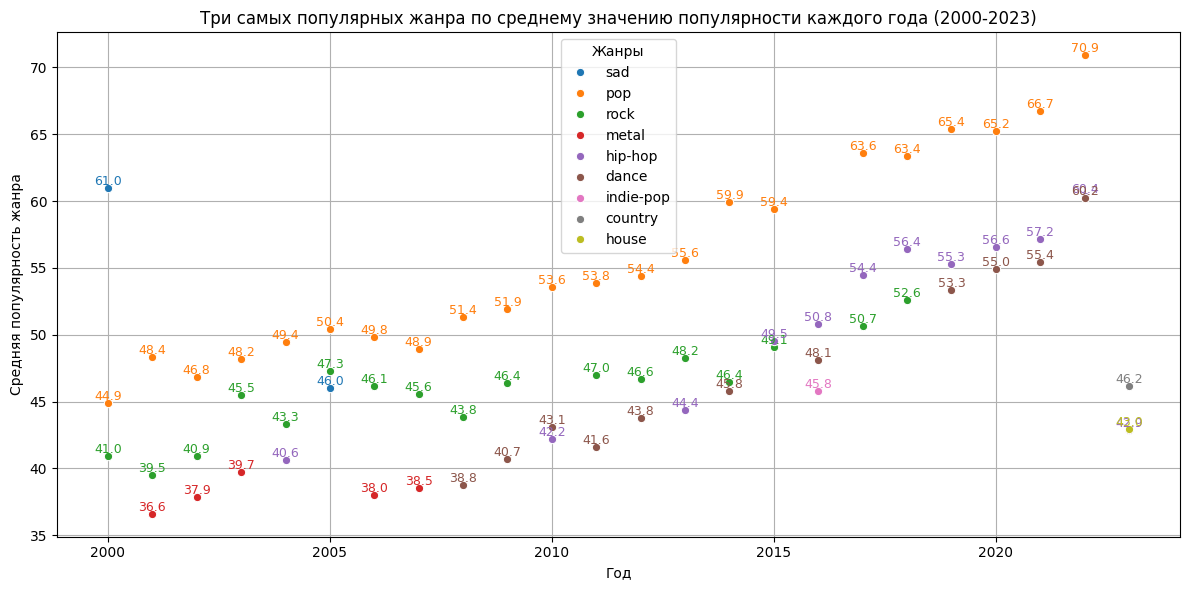

In [46]:
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')

genre_popularity_by_year = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

top_genres_per_year = genre_popularity_by_year.groupby('year').apply(
    lambda x: x.nlargest(3, 'popularity')).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_genres_per_year, x='year', y='popularity', hue='genre', marker='o', linestyle='')

for line in plt.gca().lines:
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for i in range(len(xdata)):
        plt.text(xdata[i], ydata[i], f'{ydata[i]:.1f}', color=line.get_color(),
                 ha='center', va='bottom', fontsize=9)

plt.title('Три самых популярных жанра по среднему значению популярности каждого года (2000-2023)')
plt.xlabel('Год')
plt.ylabel('Средняя популярность жанра')
plt.legend(title='Жанры')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Найдем связь между параметрами Speechiness, Acousticness и Instrumentalness

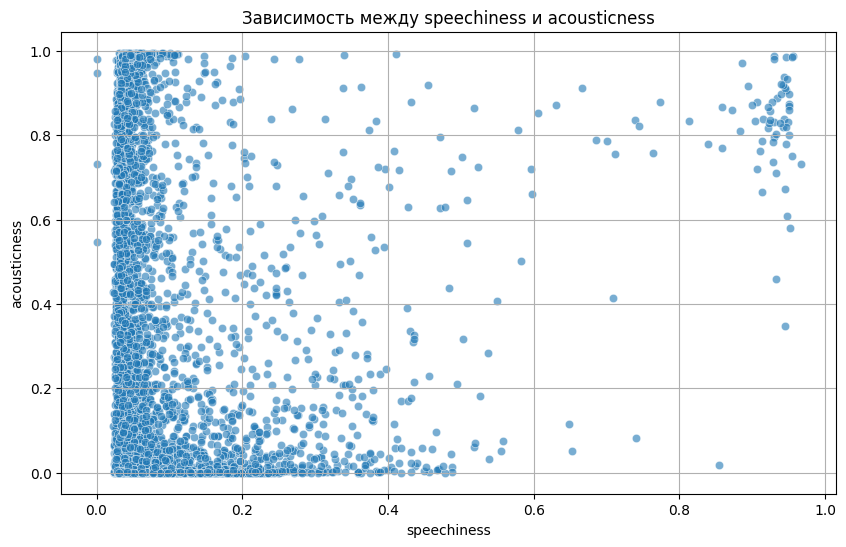

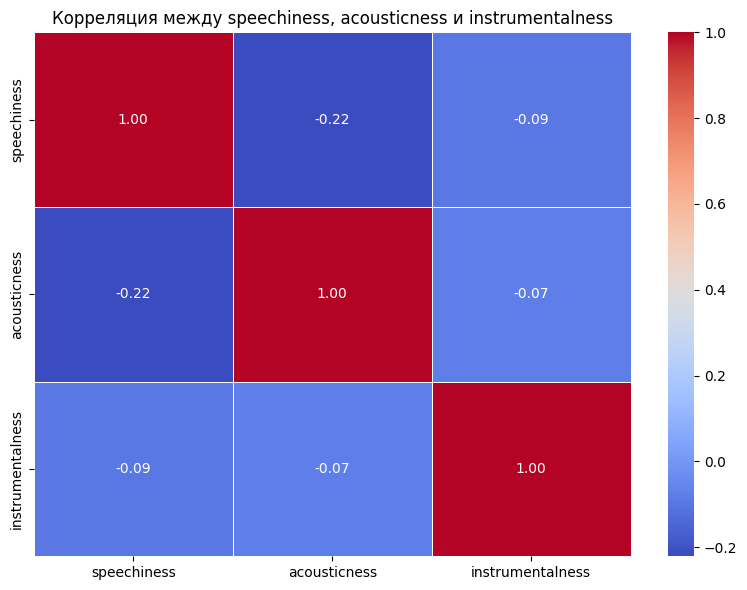

In [47]:
df_selected = df[['speechiness', 'acousticness', 'instrumentalness']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected.sample(5000), x='speechiness', y='acousticness', alpha=0.6)
plt.title('Зависимость между speechiness и acousticness')
plt.xlabel('speechiness')
plt.ylabel('acousticness')
plt.grid(True)
plt.show()

# при малой выборке точки локализуются у краев графиков, что объясняется незначительной антикорреляцией ммежду этими двумя параметрами

correlation_matrix = df_selected.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция между speechiness, acousticness и instrumentalness')
plt.tight_layout()
plt.show()

### 5. Определим влияние размера и лада на популярность в разных жанрах

Исследуем:
- Жанры для сравнения: deep-house, funk, forro, dancehall, house.
- Точечный график для каждого жанра, отражающий среднюю популярность в зависимости от размера (time_signature) и лада (mode).

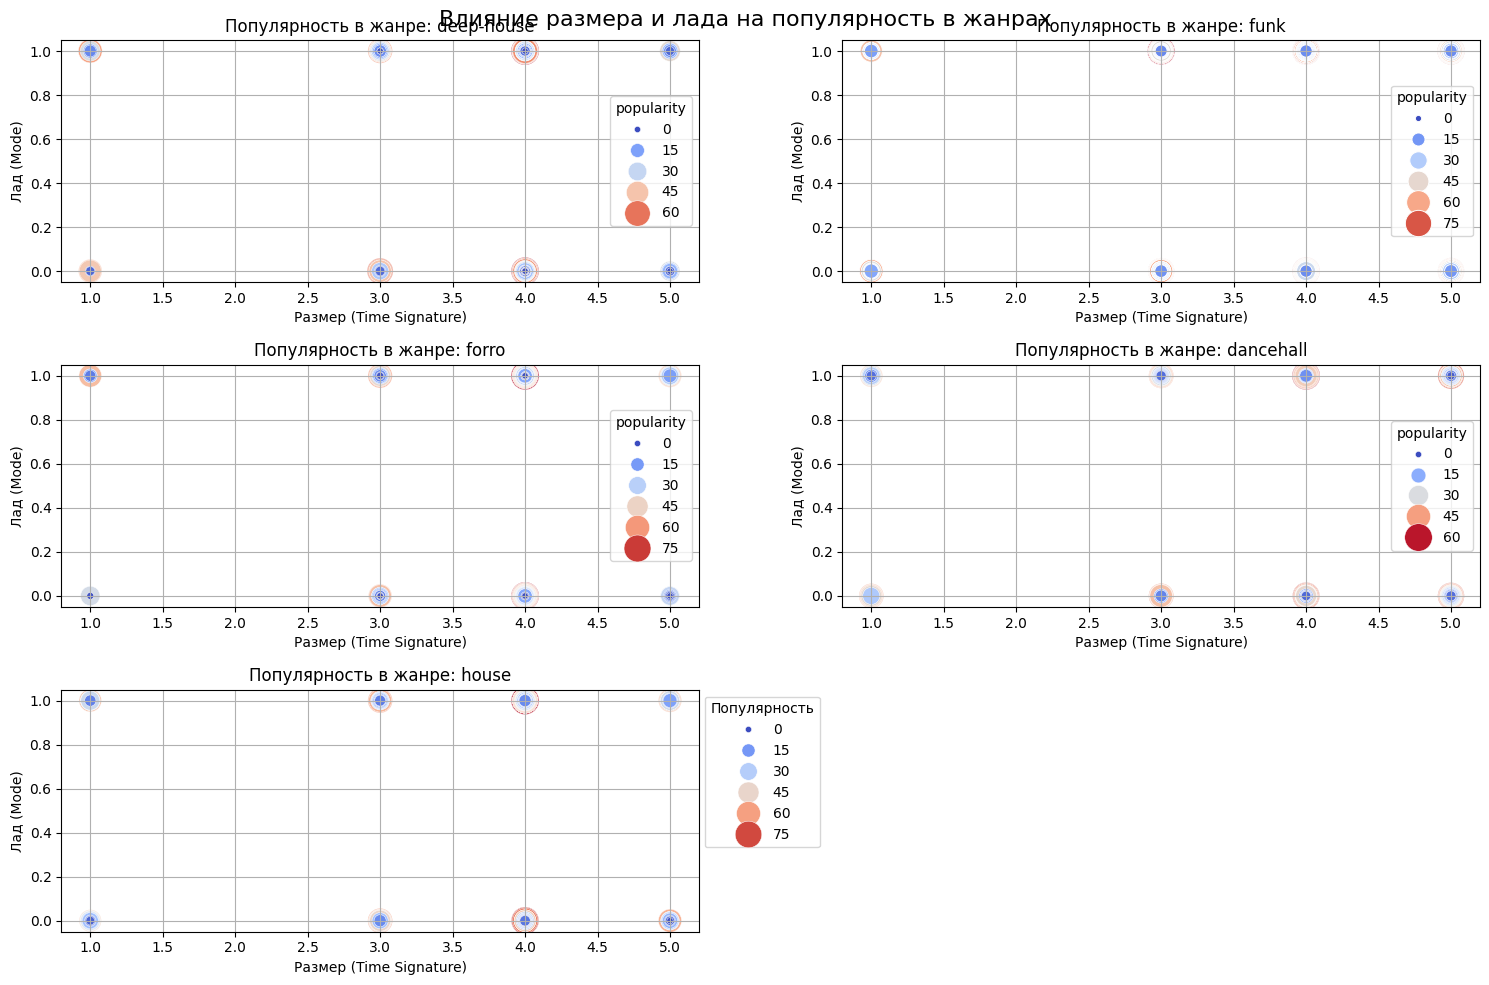

In [48]:
genres_to_analyze = ['deep-house', 'funk', 'forro', 'dancehall', 'house']

df_filtered = df[df['genre'].str.contains('|'.join(genres_to_analyze), case=False, na=False)]

plt.figure(figsize=(15, 10))

for i, genre in enumerate(genres_to_analyze, start=1):
    genre_data = df_filtered[df_filtered['genre'].str.contains(genre, case=False, na=False)]

    plt.subplot(3, 2, i)
    sns.scatterplot(data=genre_data, x='time_signature', y='mode', size='popularity', hue='popularity', palette='coolwarm', sizes=(20, 400), legend=True)

    plt.title(f'Популярность в жанре: {genre}')
    plt.xlabel('Размер (Time Signature)')
    plt.ylabel('Лад (Mode)')
    plt.grid(True)
    plt.tight_layout()

plt.legend(title="Популярность", loc='upper right', bbox_to_anchor=(1.2, 1))

plt.suptitle('Влияние размера и лада на популярность в жанрах', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### 6. Найдем зависимости плотности распределения, построенные для темпа по уникальным значениям размера трека, а также плотности нормальных распределений по этим данным

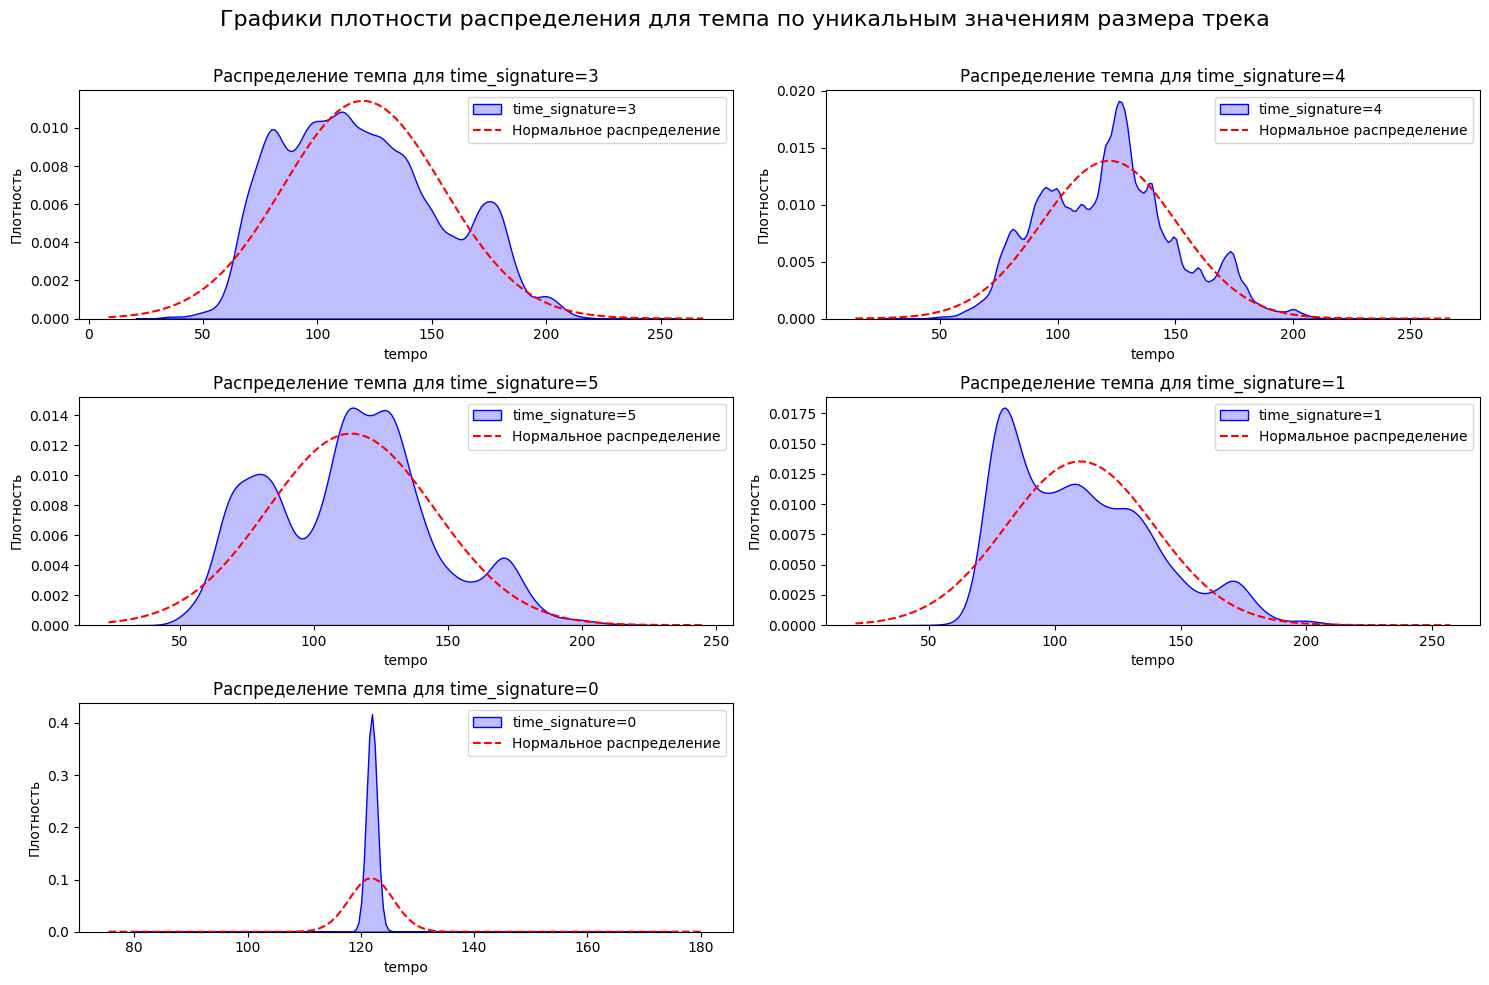

In [49]:
from scipy.stats import norm
import numpy as np

df_filtered = df[['time_signature', 'tempo']].dropna()

unique_time_signatures = df_filtered['time_signature'].unique()

plt.figure(figsize=(15, 10))

for i, time_sig in enumerate(unique_time_signatures, start=1):
    time_sig_data = df_filtered[df_filtered['time_signature'] == time_sig]

    plt.subplot(len(unique_time_signatures) // 2 + 1, 2, i)
    sns.kdeplot(time_sig_data['tempo'], fill=True, label=f'time_signature={time_sig}', color='blue')

    mu, std = norm.fit(time_sig_data['tempo'])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, label='Нормальное распределение', color='red', linestyle='--')

    plt.title(f'Распределение темпа для time_signature={time_sig}')
    plt.xlabel('tempo')
    plt.ylabel('Плотность')
    plt.legend()

plt.suptitle('Графики плотности распределения для темпа по уникальным значениям размера трека', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### 7. Проанализируем популярность любого артиста (группы)
Без ограничения общности возьмем первого артиста из датасета

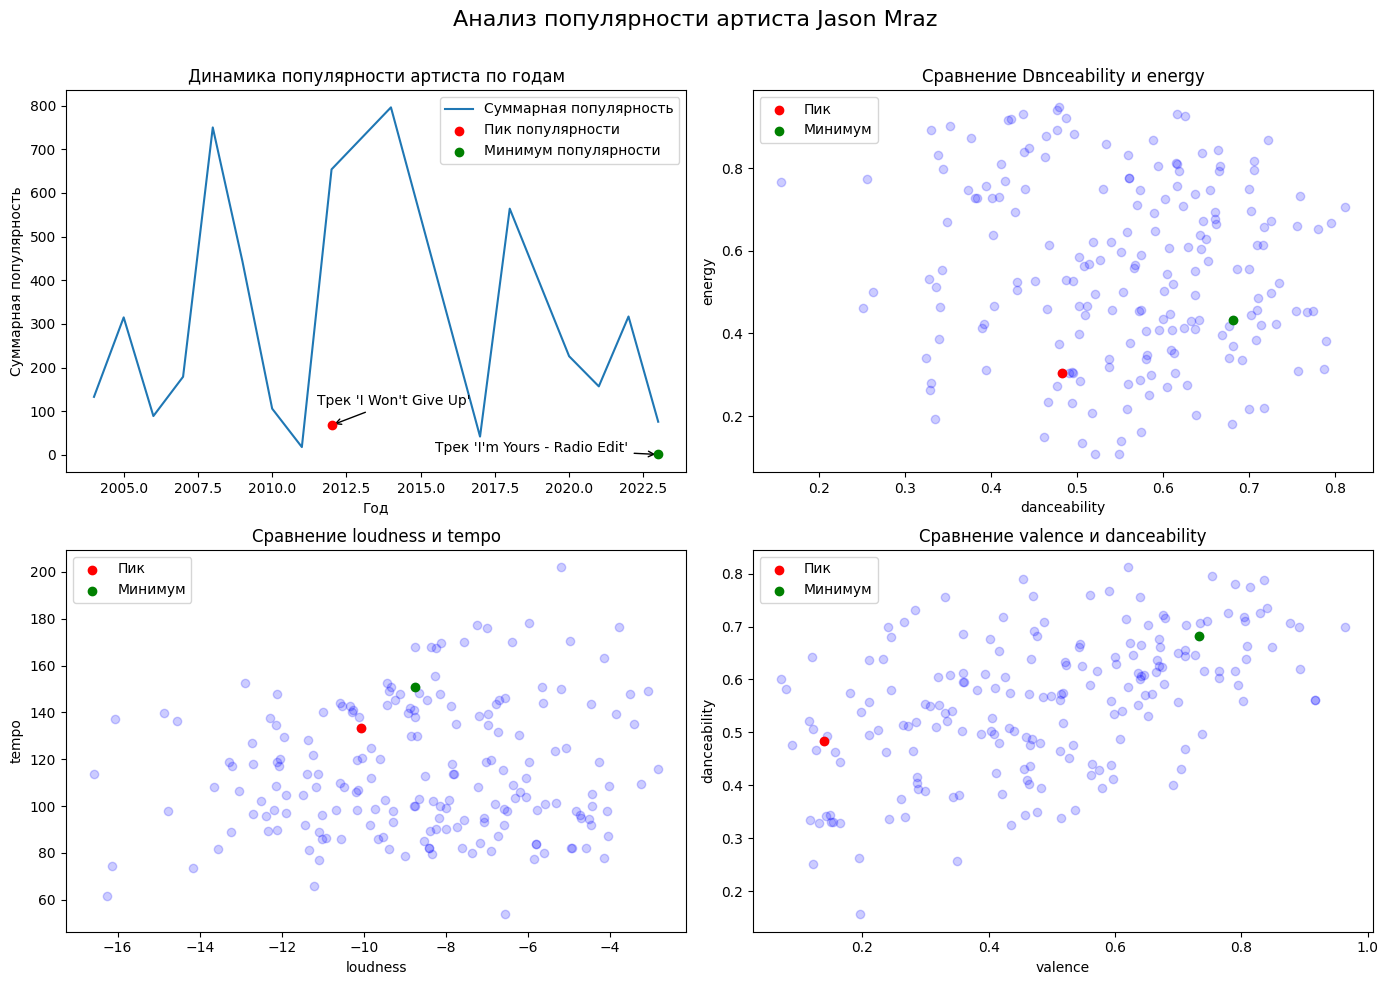

In [50]:
artist_name = df['artist_name'][0]
artist_data = df[df['artist_name'] == artist_name]

artist_data['year'] = artist_data['year'].astype(int)

popularity_by_year = artist_data.groupby('year')['popularity'].sum().reset_index()

peak_track = artist_data.loc[artist_data['popularity'].idxmax()]
low_track = artist_data.loc[artist_data['popularity'].idxmin()]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Анализ популярности артиста {artist_name}', fontsize=16)

axes[0, 0].plot(popularity_by_year['year'], popularity_by_year['popularity'], label='Суммарная популярность')
axes[0, 0].scatter(peak_track['year'], peak_track['popularity'], color='red', label='Пик популярности', zorder=5)
axes[0, 0].scatter(low_track['year'], low_track['popularity'], color='green', label='Минимум популярности', zorder=5)
arrowprops = {
    'arrowstyle': '->',
}
axes[0, 0].annotate(f"Трек '{peak_track['track_name']}'",
                xy=(peak_track['year'], peak_track['popularity']),
                xytext=(peak_track['year'] - 0.5, peak_track['popularity'] + 45.2),
                arrowprops=arrowprops)
axes[0, 0].annotate(f"Трек '{low_track['track_name']}'",
                xy=(low_track['year'], low_track['popularity']),
                xytext=(low_track['year'] - 7.5, low_track['popularity'] + 5.2),
                arrowprops=arrowprops)
axes[0, 0].set_title('Динамика популярности артиста по годам')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Суммарная популярность')
axes[0, 0].legend()

peak_features = peak_track[['danceability', 'energy', 'loudness', 'tempo', 'valence']]
low_features = low_track[['danceability', 'energy', 'loudness', 'tempo', 'valence']]

axes[0, 1].scatter(artist_data['danceability'], artist_data['energy'], color='blue', alpha=0.2)
axes[0, 1].scatter(peak_features['danceability'], peak_features['energy'], color='red', label='Пик')
axes[0, 1].scatter(low_features['danceability'], low_features['energy'], color='green', label='Минимум')
axes[0, 1].set_title('Сравнение Dвnceability и energy')
axes[0, 1].set_xlabel('danceability')
axes[0, 1].set_ylabel('energy')
axes[0, 1].legend()

axes[1, 0].scatter(artist_data['loudness'], artist_data['tempo'], color='blue', alpha=0.2)
axes[1, 0].scatter(peak_features['loudness'], peak_features['tempo'], color='red', label='Пик')
axes[1, 0].scatter(low_features['loudness'], low_features['tempo'], color='green', label='Минимум')
axes[1, 0].set_title('Сравнение loudness и tempo')
axes[1, 0].set_xlabel('loudness')
axes[1, 0].set_ylabel('tempo')
axes[1, 0].legend()

axes[1, 1].scatter(artist_data['valence'], artist_data['danceability'], color='blue', alpha=0.2)
axes[1, 1].scatter(peak_features['valence'], peak_features['danceability'], color='red', label='Пик')
axes[1, 1].scatter(low_features['valence'], low_features['danceability'], color='green', label='Минимум')
axes[1, 1].set_title('Сравнение valence и danceability')
axes[1, 1].set_xlabel('valence')
axes[1, 1].set_ylabel('danceability')
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()